In [235]:
import pandas as pd
df0 = pd.read_csv('data0.txt', sep="\s*")
df1 = pd.read_csv('data1.txt', sep="\s*")
df_t0 = pd.read_csv('tdata0.txt', sep="\s*")
df_t1 = pd.read_csv('tdata1.txt', sep="\s*")

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='

In [94]:
pd.set_option('display.max_columns', 40)

In [236]:
df = pd.concat([df0,df1])
df_t = pd.concat([df_t0,df_t1])

df = df.reset_index(level=[0,1])
df_t = df_t.reset_index(level=[0,1])

df['date'] = df['level_1']+df['level_0'].str.lower()
df_t['date'] = df_t['level_1']+df_t['level_0'].str.lower()



In [239]:
df = df['date']

In [242]:
list_w_kl = list(df)

In [250]:
df_w_kawhi = df_t[df_t["date"].isin(list_w_kl)]

In [264]:
df_wo_kawhi = df_t[~df_t["date"].isin(list_w_kl)]

In [258]:
team_stat = [48.5,114.4,42.2,89.1,47.4,12.4,33.8,36.6,17.7,22.0,80.4,9.6,35.6,45.2,25.4,14.0,8.3,5.3,21.0]

In [259]:
dictionary = dict(zip(list(df_mean.index), team_stat))

In [260]:
df_team_stat = pd.DataFrame.from_dict(dictionary,orient='index').rename(index=str, columns={0: "team_stat"})

In [266]:
team_stat_df_w_Kawhi = pd.DataFrame(df_w_kawhi.mean()).rename(index=str, columns={0: "team_stat_w_Kawhi"})
team_stat_df_wo_Kawhi = pd.DataFrame(df_wo_kawhi.mean()).rename(index=str, columns={0: "team_stat_wo_Kawhi"})

In [276]:
res = pd.concat([df_team_stat,team_stat_df_w_Kawhi,team_stat_df_wo_Kawhi],axis=1, sort=False).drop(['MIN'])

In [277]:
res

,team_stat,team_stat_w_Kawhi,team_stat_wo_Kawhi
PTS,114.4,113.433333,117.181818
FGM,42.2,41.866667,43.090909
FGA,89.1,88.650000,90.272727
FG%,47.4,47.453333,47.954545
3PM,12.4,11.933333,13.590909
3PA,33.8,33.033333,35.863636
3P%,36.6,35.990000,37.959091
FTM,17.7,17.766667,17.409091
FTA,22.0,22.000000,21.954545
FT%,80.4,80.961667,80.518182


In [279]:
import matplotlib.pyplot as plt

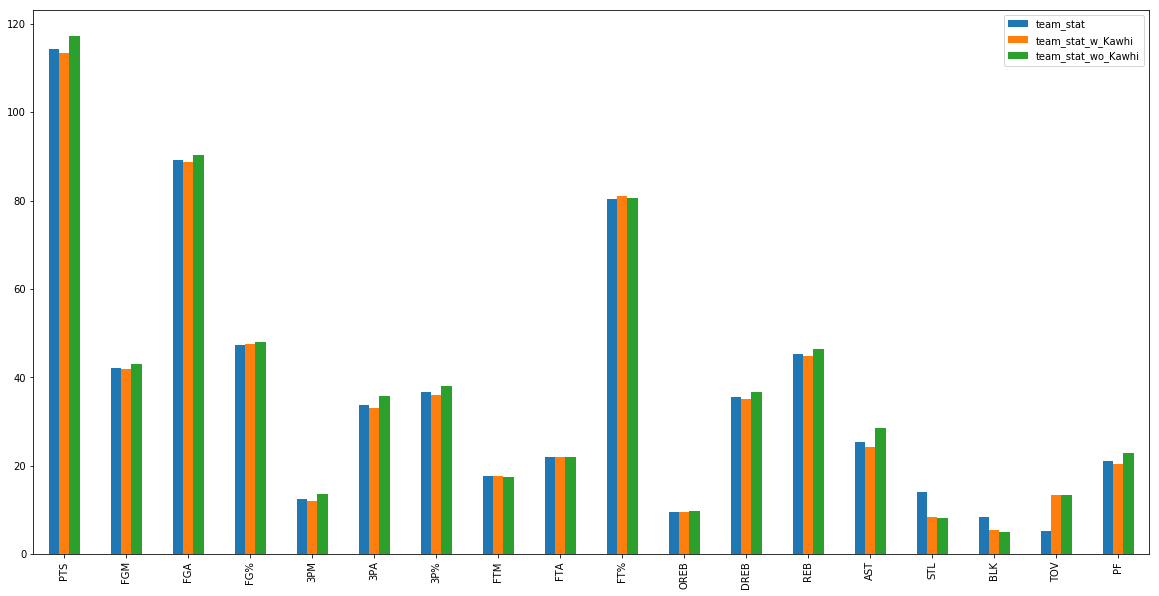

In [281]:
res.plot.bar(figsize=(20,10));